# ML Project 6033657523 - Support Vector Regression

## Importing the libraries

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

## Importing the cleaned dataset

In [3]:
dataset = pd.read_csv('Final_data.csv')
X = dataset.drop(['Unnamed: 0','price'], axis=1)
y = dataset['price']

## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Support Vector Regression

### Fitting Support Vector Regression to the Training Set

In [5]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42)

regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [6]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148417,1,4,0,0,4,1,1,19.42,6,13524
36879,3,2,0,1,5,1,1,7.00,13,9940
274531,1,4,0,0,0,1,0,21.17,44,55983
166397,5,3,5,0,1,0,1,10.25,11,7927
272722,5,4,5,0,5,1,0,26.50,5,55502


## Evaluate model accuracy

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([ 6721.8, 70429.9,  6195. , ...,  6524. ,  3268.4, 72618.6])

In [8]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,1,2,4,0,1,4,1,19.75,40,7366
266857,5,4,4,0,5,5,0,9.83,42,64831
141228,5,4,4,0,5,0,1,10.50,41,6195
288329,5,1,5,0,4,2,0,14.50,14,60160
97334,1,0,0,0,5,5,1,8.25,20,6578


Compare GenPrice with PredictedGenPrice

In [9]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedPrice')], axis = 1).round(2)
datasetPredict.head(10)

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
0,27131,1,2,4,0,1,4,1,19.75,40,7366,6721.8
1,266857,5,4,4,0,5,5,0,9.83,42,64831,70429.9
2,141228,5,4,4,0,5,0,1,10.50,41,6195,6195.0
3,288329,5,1,5,0,4,2,0,14.50,14,60160,59936.0
4,97334,1,0,0,0,5,5,1,8.25,20,6578,6291.1
5,135931,0,4,1,0,0,0,1,10.83,5,4555,5981.4
6,290630,5,1,0,2,0,5,0,2.00,7,23838,23838.0
7,141944,3,4,1,0,0,0,1,7.75,46,3860,3860.0
8,244517,1,5,5,0,5,1,0,26.33,44,32230,50816.2
9,215903,5,2,5,0,2,4,0,20.17,2,76841,61554.3


In [10]:
datasetPredict.corr()

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,PredictedPrice
index,1.000000,0.184656,-0.087756,0.091498,-0.128608,0.026470,0.020889,-0.801685,0.167555,0.019587,0.760820,0.764253
airline,0.184656,1.000000,-0.030061,0.052285,-0.027956,0.037172,-0.026444,-0.183062,-0.001198,-0.010591,0.247096,0.248088
source_city,-0.087756,-0.030061,1.000000,0.000629,0.002251,0.039460,-0.219337,-0.002933,0.007664,-0.007628,0.006965,0.007529
departure_time,0.091498,0.052285,0.000629,1.000000,-0.015022,-0.045902,-0.001146,-0.055038,0.090452,0.000632,0.060217,0.059958
stops,-0.128608,-0.027956,0.002251,-0.015022,1.000000,0.004413,-0.010485,0.103969,-0.472470,-0.015345,-0.203027,-0.204041
arrival_time,0.026470,0.037172,0.039460,-0.045902,0.004413,1.000000,-0.035265,-0.022071,0.010202,-0.008933,0.038758,0.038396
destination_city,0.020889,-0.026444,-0.219337,-0.001146,-0.010485,-0.035265,1.000000,-0.001194,0.003362,-0.005631,0.006989,0.005845
class,-0.801685,-0.183062,-0.002933,-0.055038,0.103969,-0.022071,-0.001194,1.000000,-0.145016,0.012049,-0.938095,-0.942242
duration,0.167555,-0.001198,0.007664,0.090452,-0.472470,0.010202,0.003362,-0.145016,1.000000,-0.035719,0.208457,0.209463
days_left,0.019587,-0.010591,-0.007628,0.000632,-0.015345,-0.008933,-0.005631,0.012049,-0.035719,1.000000,-0.091088,-0.092521


In [11]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.9968399121546337
Test set accuracy = 0.9837102245238682


### MSE

In [12]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 8397090.498362835


### MAPE

In [13]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 7.294061156331052


### Visualize Results

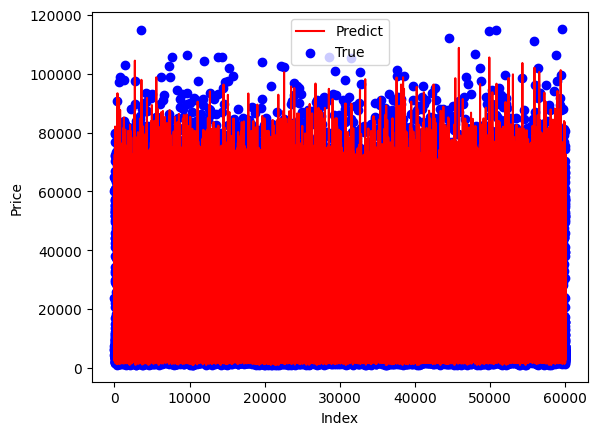

In [14]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()